# Data Load

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

print(f"Train data : {len(train)}")
print(f"Test data : {len(test)}")

Train data : 1015
Test data : 436


In [11]:
print(f"Train describe \n {train.describe()}")
print("-"*65)
print(f"Test describe \n {test.describe()}")


Train describe 
                 id       odometer         year        target
count  1015.000000    1015.000000  1015.000000  1.015000e+03
mean    507.000000  116842.121182  2008.385222  8.243204e+06
std     293.149564  105162.545836    35.592123  1.239567e+07
min       0.000000       0.000000  1217.000000  4.000000e+05
25%     253.500000   55918.000000  2006.000000  2.535000e+06
50%     507.000000   94972.000000  2010.000000  4.215000e+06
75%     760.500000  153224.000000  2014.000000  8.927500e+06
max    1014.000000  987322.000000  2020.000000  1.500150e+08
-----------------------------------------------------------------
Test describe 
                id      odometer         year
count  436.000000  4.360000e+02   436.000000
mean   217.500000  1.167091e+05  2009.080275
std    126.006614  1.376658e+05    46.582869
min      0.000000  0.000000e+00  1324.000000
25%    108.750000  4.760675e+04  2006.000000
50%    217.500000  8.977550e+04  2010.000000
75%    326.250000  1.512712e+05  2014

In [13]:
# 결측치 확인

def check_na_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        null_sum = sum(dataframe[col].isna())
        isNull = True if null_sum > 1 else False

        if isNull:
            print(f"결측치 column : {col}")
            print(f"결측치 개수 : {null_sum}")

            missing_col.append([col, dataframe[col].dtype])

    if not missing_col:
        print("결측치가 존재하지 않습니다.")

    return missing_col

missing_col = check_na_col(train)

결측치가 존재하지 않습니다.


In [14]:
# 데이터 정보

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1015 non-null   int64 
 1   title         1015 non-null   object
 2   odometer      1015 non-null   int64 
 3   location      1015 non-null   object
 4   isimported    1015 non-null   object
 5   engine        1015 non-null   object
 6   transmission  1015 non-null   object
 7   fuel          1015 non-null   object
 8   paint         1015 non-null   object
 9   year          1015 non-null   int64 
 10  target        1015 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 87.4+ KB


# Data distribution

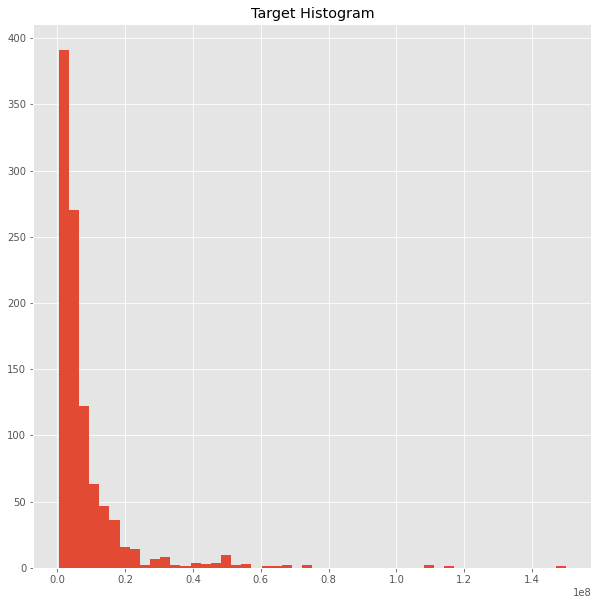

In [17]:
plt.style.use('ggplot')

plt.figure(figsize=(10,10))
plt.hist(train.target, bins=50)
plt.title("Target Histogram")
plt.show()

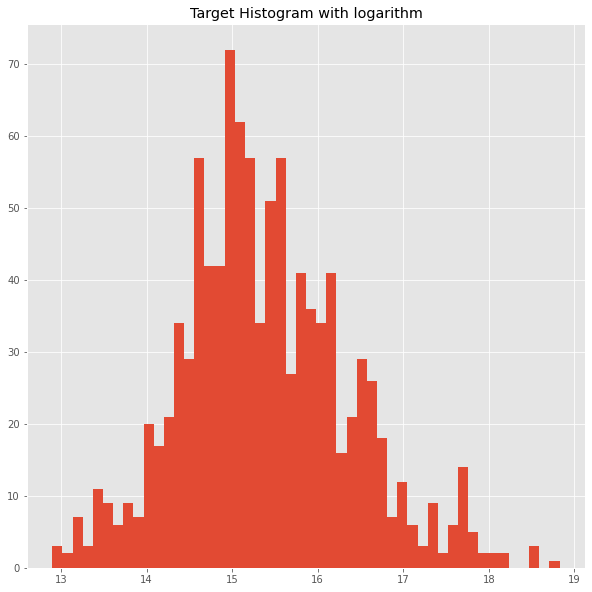

In [19]:
# log scale

log_target = np.log(train.target)

plt.figure(figsize=(10,10))
plt.hist(log_target, bins=50)
plt.title("Target Histogram with logarithm")
plt.show()

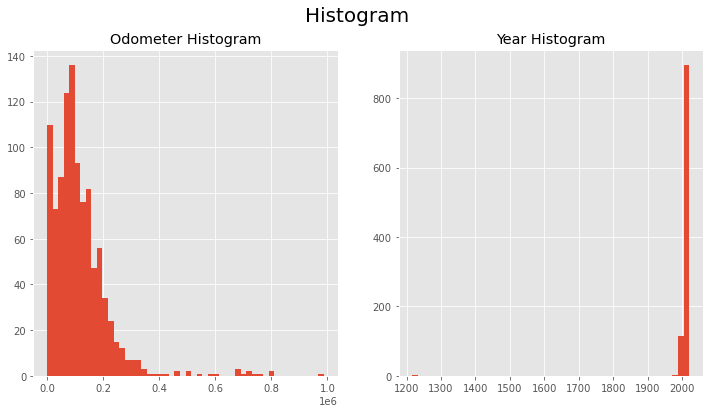

In [20]:

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train.odometer, bins=50)
plt.title('Odometer Histogram')

plt.subplot(1,2,2)
plt.hist(train.year, bins=50)
plt.title('Year Histogram')
plt.show()

In [21]:
train[train['year'] < 1900]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
415,415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,4-cylinder(I4),manual,diesel,white,1218,6015000
827,827,Mercedes-Benz/52,510053,Lagos,Locally used,6-cylinder(V6),manual,diesel,white,1217,75015000


In [30]:
train = train[train['year'] > 1900]
train.shape

(1013, 11)

In [31]:
# Remove year outlier
train = train.drop('id', axis = 1).reset_index().drop('index', axis = 1).reset_index().rename({'index':'id'}, axis = 'columns')

# statistics

In [32]:
data_description = train.describe().iloc[:,1:3]
data_description

,odometer,year
count,1013.000000,1013.000000
mean,116171.015795,2009.946693
std,104147.052690,5.540466
min,0.000000,1980.000000
25%,55775.000000,2006.000000
50%,94803.000000,2010.000000
75%,152878.000000,2014.000000
max,987322.000000,2020.000000


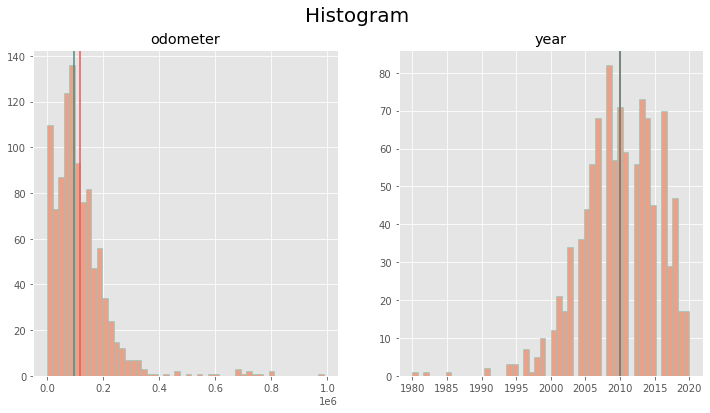

In [33]:
plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train['odometer'], bins=50, color='#eaa18a', edgecolor='#7bcabf')
plt.title('odometer')
plt.axvline(data_description['odometer']['mean'], c='#f55354', label = f"mean = {round(data_description['odometer']['mean'], 2)}")
plt.axvline(data_description['odometer']['50%'], c='#518d7d', label = f"median = {round(data_description['odometer']['50%'], 2)}")

plt.subplot(1,2,2)
# 수치형 데이터 통계치 그래프
plt.hist(train['year'], bins = 50, color='#eaa18a', edgecolor='#7bcabf')
plt.title('year')
plt.axvline(data_description['year']['mean'], c='#f55354', label = f"mean = {round(data_description['year']['mean'], 2)}")
plt.axvline(data_description['year']['50%'], c='#518d7d', label = f"median = {round(data_description['year']['50%'], 2)}")

In [34]:
print('Odometer 평균은', round(data_description['odometer']['mean']), '입니다')
print('Odometer 중앙값은', round(data_description['odometer']['50%']), '입니다')
print('Year 평균은', round(data_description['year']['mean']), '입니다')
print('Year 중앙값은', round(data_description['year']['50%']), '입니다')

Odometer 평균은 116171 입니다
Odometer 중앙값은 94803 입니다
Year 평균은 2010 입니다
Year 중앙값은 2010 입니다


Text(0.5, 1.0, 'year')

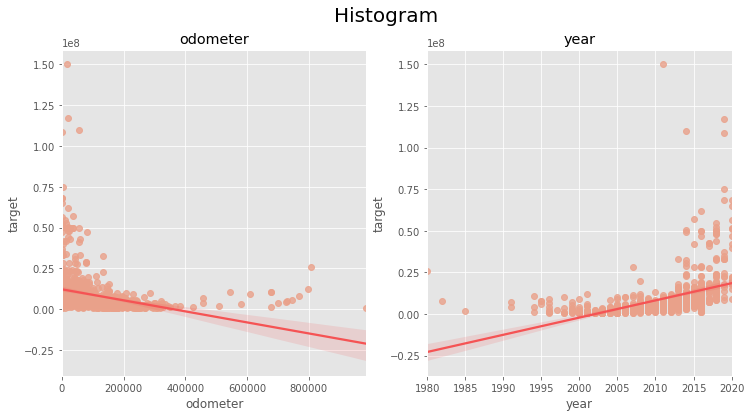

In [35]:
import seaborn as sns

plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
sns.regplot(x='odometer', y='target', data=train,  color='#eaa18a', line_kws=  {'color': '#f55354'})
plt.title('odometer')

plt.subplot(1,2,2)
sns.regplot(x='year', y='target', data=train,  color='#eaa18a', line_kws=  {'color': '#f55354'})
plt.title('year')

In [38]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[['odometer', 'year', 'target']]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')
corr28

<ipython-input-38-673b681f7daa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,odometer,year,target
odometer,1.000000,-0.509608,-0.287731
year,-0.509608,1.000000,0.468276
target,-0.287731,0.468276,1.000000


Text(0.5, 1.0, 'Correlation between features')

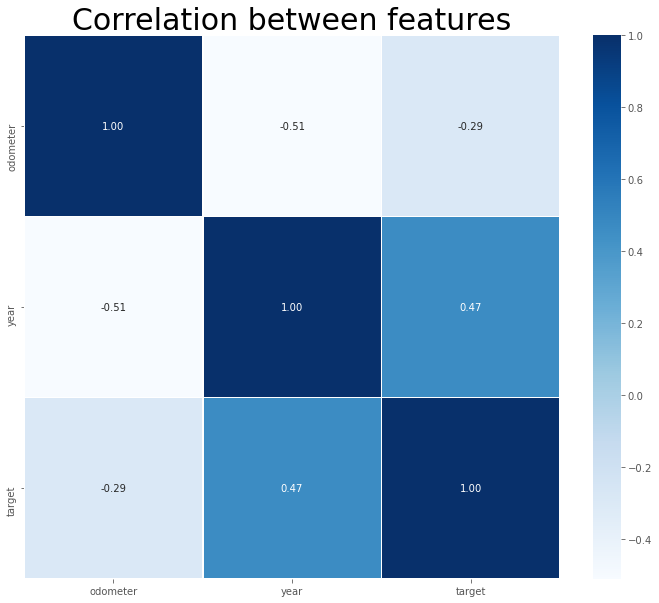

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [40]:
# target과의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['target'].sort_values(ascending=False), columns=['target'])
df_temp28.style.background_gradient(cmap='viridis')

,target
target,1.000000
year,0.468276
odometer,-0.287731


In [41]:
train.describe(include="object")

,title,location,isimported,engine,transmission,fuel,paint
count,1013,1013,1013,1013,1013,1013,1013
unique,201,13,3,8,2,2,76
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,129,790,744,617,965,970,292


In [42]:
train.title

0                        Toyota RAV 4
1                 Toyota Land Cruiser
2       Land Rover Range Rover Evoque
3                        Lexus ES 350
4                        Toyota Venza
                    ...              
1008                   Toyota Corolla
1009                     Toyota Camry
1010                     Toyota Camry
1011                     Lexus GX 460
1012                           DAF CF
Name: title, Length: 1013, dtype: object

In [43]:
train['title'].apply(lambda x : x.split(" ")[0])

0       Toyota
1       Toyota
2         Land
3        Lexus
4       Toyota
         ...  
1008    Toyota
1009    Toyota
1010    Toyota
1011     Lexus
1012       DAF
Name: title, Length: 1013, dtype: object

In [47]:
train['brand'] = train['title'].apply(lambda x : x.split(" ")[0])

In [48]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [54]:
train.paint.unique()

array(['Red', 'Black', 'Gray', 'White', 'Blue', 'Redl', 'Silver',
       ' Black/Red', 'Deep Blue', 'Dark Grey', 'Brown', 'Grey', 'Green',
       'Purple', 'Gold', 'Dark Blue', 'Milk', 'Midnight Black Metal',
       'Deep blue', 'green', 'Beige', 'Blue ', 'Silver ', 'red', 'white',
       'Dark Ash', 'Black ', 'orange', 'Cream', 'blue', 'Dark gray',
       'Sliver', 'White orchild pearl', 'Dark Green', 'Gold ', 'Yellow',
       'Grey ', 'Light Gold', 'White ', 'Wine', 'white-blue',
       'Magnetic Gray', 'WHITE', 'yellow', 'Gray ', 'Dark silver ',
       'Dark blue ', 'SILVER', 'Black.', 'WINE', 'Silver/grey',
       'Ink blue', 'Light blue', 'Sky blue', 'Gery', 'Pale brown',
       'Whine ', 'Cream ', 'Black and silver', 'DARK GREY', 'Dark ash',
       'Light silver ', 'BLACK', 'GOLD', 'Black sand pearl', 'Off white',
       'Ash', 'Maroon', 'Navy blue', 'Super White', ' Black',
       'Ash and black', 'Green ', 'Magnetic Gray Metallic', 'Skye blue',
       'Off white l'], dtype=obje

In [57]:
import re

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review)

    return corpus

train['paint'] = clean_text(train.paint)
train.paint.unique()

array(['red', 'black', 'gray', 'white', 'blue', 'redl', 'silver',
       'blackred', 'deep blue', 'dark grey', 'brown', 'grey', 'green',
       'purple', 'gold', 'dark blue', 'milk', 'midnight black metal',
       'beige', 'dark ash', 'orange', 'cream', 'dark gray', 'sliver',
       'white orchild pearl', 'dark green', 'yellow', 'light gold',
       'wine', 'whiteblue', 'magnetic gray', 'dark silver', 'silvergrey',
       'ink blue', 'light blue', 'sky blue', 'gery', 'pale brown',
       'whine', 'black and silver', 'light silver', 'black sand pearl',
       'off white', 'ash', 'maroon', 'navy blue', 'super white',
       'ash and black', 'magnetic gray metallic', 'skye blue',
       'off white l'], dtype=object)

In [58]:
# 오타교정
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [61]:
len(train.paint.unique())

18

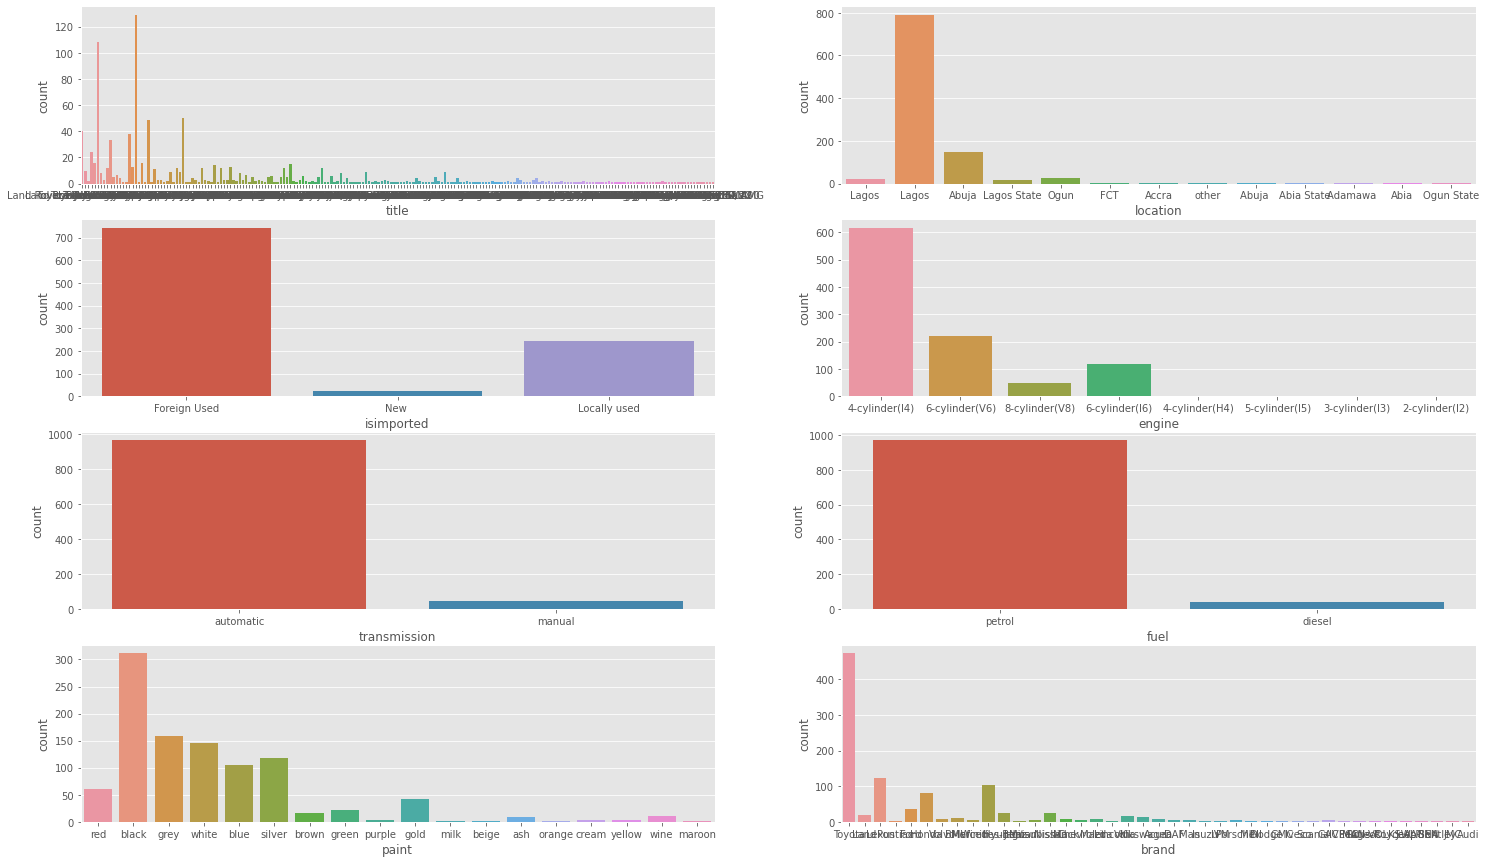

In [62]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
count = 1

for i in train.describe(include="object").columns:
    plt.subplot(4,2,count)
    # countplot 을 사용해서 데이터의 분포를 살펴봅니다.
    sns.countplot(data=train, x=i)
    count += 1

In [63]:
# top 10
train_title10 = train[train['title'].apply(lambda x : x in train['title'].value_counts()[:10].keys())]
train_brand10 = train[train['brand'].apply(lambda x : x in train['brand'].value_counts()[:10].keys())]

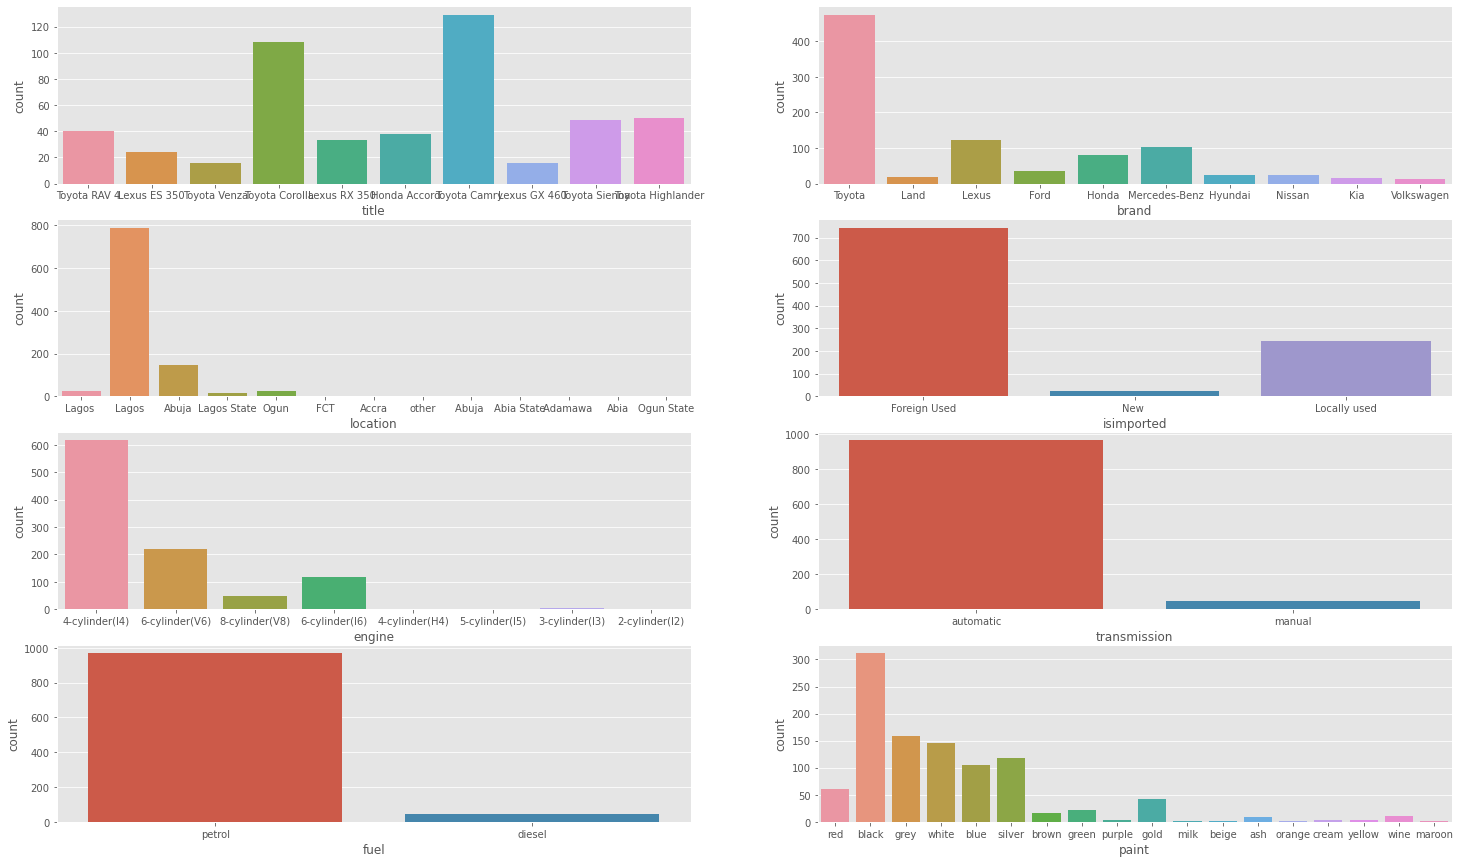

In [64]:
plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.countplot(data=train_title10, x='title')
plt.subplot(4,2,2)
sns.countplot(data=train_brand10, x='brand')
count = 3

for i in train.describe(include="object").columns.drop(['title'])[:-1]:
    plt.subplot(4,2,count)
    sns.countplot(data=train, x=i)
    count += 1

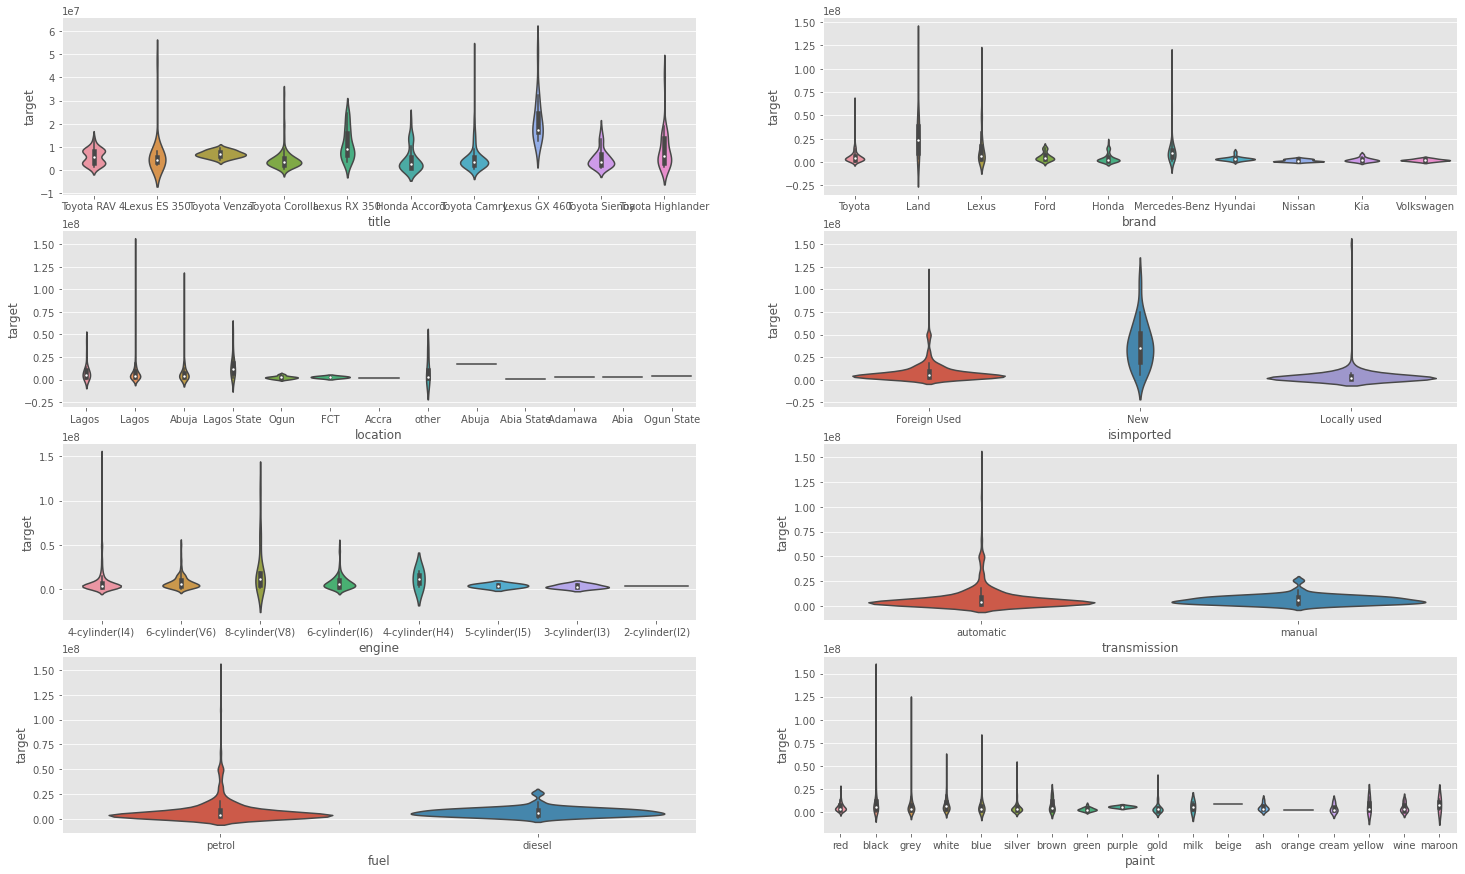

In [65]:
plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.violinplot(data=train_title10, x='title', y ='target')
plt.subplot(4,2,2)
sns.violinplot(data=train_brand10, x='brand', y ='target')
count = 3

for i in train.describe(include="object").columns.drop(['title'])[:-1]:
    plt.subplot(4,2,count)
    sns.violinplot(data=train, x=i, y ='target')
    count += 1

# Label encoding


In [66]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,grey,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2010,7385000,Toyota


In [70]:
def LabelEncoding(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype == "object":
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i + 1

            label_maps[col] = label_map
    print(label_maps)

    return label_maps

def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown'])
    return dataframe

label_maps = LabelEncoding(train)
train = label_encoder(train, label_maps)
train.head()

{'title': {'unknown': 0, 'Toyota RAV 4': 1, 'Toyota Land Cruiser': 2, 'Land Rover Range Rover Evoque': 3, 'Lexus ES 350': 4, 'Toyota Venza': 5, 'Toyota Corolla': 6, 'Land Rover Range Rover Sport': 7, 'Pontiac Vibe': 8, 'Toyota Tacoma': 9, 'Lexus RX 350': 10, 'Ford Escape': 11, 'Honda Civic': 12, 'Volvo XC90': 13, 'BMW 750': 14, 'Infiniti JX': 15, 'Honda Accord': 16, 'Mercedes-Benz ML 350': 17, 'Toyota Camry': 18, 'Hyundai Azera': 19, 'Lexus GX 460': 20, 'BMW 325': 21, 'Toyota Sienna': 22, 'Honda Fit': 23, 'Honda CR-V': 24, 'Hyundai Tucson': 25, 'Ford Transit': 26, 'Jaguar XJ8': 27, 'BMW X6': 28, 'Mercedes-Benz C 300': 29, 'Mitsubishi Galant': 30, 'Mercedes-Benz GL 450': 31, 'Lexus RX 300': 32, 'Toyota Highlander': 33, 'Mitsubishi CANTER PICK UP': 34, 'Nissan Titan': 35, 'Lexus IS 250': 36, 'Mercedes-Benz 200': 37, 'Toyota Sequoia': 38, 'Ford Explorer': 39, 'Hyundai ix35': 40, 'Mack CH613 CONVENTIONAL CAB': 41, 'Lexus CT 200h': 42, 'Lexus LX 570': 43, 'Toyota Avensis': 44, 'Toyota 4-Run

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,1,18277,1,1,1,1,1,1,2016,13665000,1
1,1,2,10,2,2,1,1,1,2,2019,33015000,1
2,2,3,83091,2,1,2,1,1,1,2012,9915000,2
3,3,4,91524,2,1,1,1,1,3,2007,3815000,3
4,4,5,94177,2,1,2,1,1,1,2010,7385000,1


# Modeling

In [71]:
X = train.drop(['id', 'target'], axis = 1) #training 데이터에서 피쳐 추출
y = train.target #training 데이터에서 중고차 가격 추출

In [72]:
# divide the data (train : train, validation)

from sklearn.model_selection import train_test_split

data = train.drop('id', axis = 1).copy() #필요없는 id열 삭제
train_data, val_data = train_test_split(data, test_size=0.25) #25프로로 설정
train_data.reset_index(inplace=True) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val_data.reset_index(inplace=True)

In [77]:
print("train set : ", len(train_data))
print("valid_set : ", len(val_data))

train set :  759
valid_set :  254


In [81]:
# Split tarin_data : target

train_data_x = train_data.drop(['target', 'index'], axis=1)
train_data_y = train_data.target

val_data_x = val_data.drop(['target', 'index'], axis=1)
val_data_y = val_data.target

# total data
train_X = train.drop(['id','target'], axis=1)
train_y = train.target

In [82]:
# random forest model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_data_x, train_data_y)

RandomForestRegressor()

In [171]:
# GBM

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(train_data_x, train_data_y)

GradientBoostingRegressor()

In [ ]:
# Total Train

total_model = GradientBoostingRegressor()
total_model.fit(train_X, train_y)

In [172]:
from sklearn.metrics import mean_squared_error

def nmae(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))

    return score
    

y_hat = model.predict(val_data_x)
print(f"NMAE : {nmae(val_data_y, y_hat)}")

NMAE : 0.3552949690177807


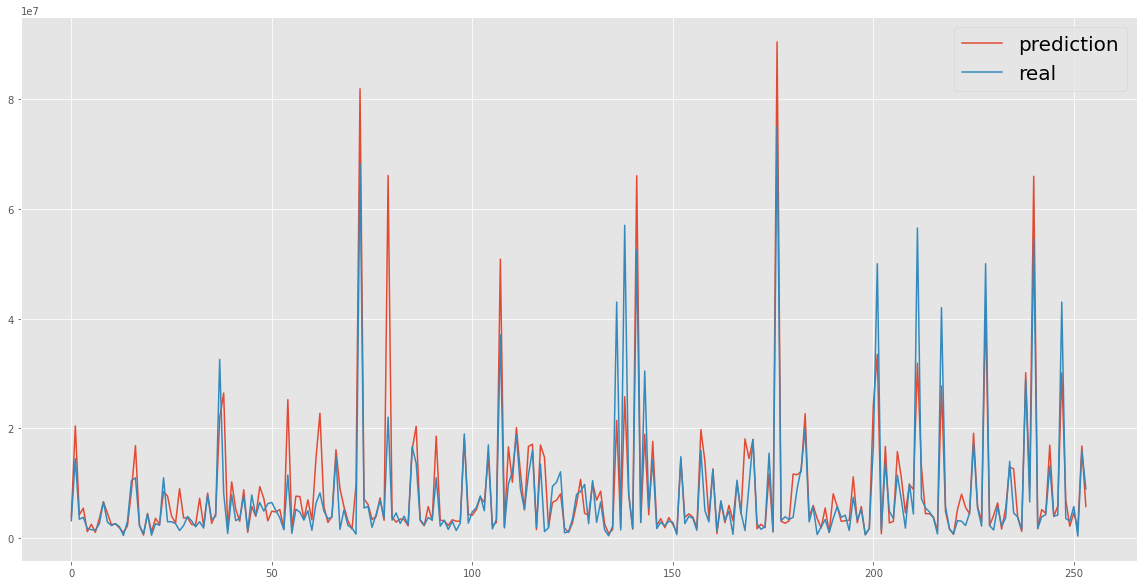

In [173]:
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(val_data_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

# Preprocessing Test data

In [91]:
# predict the test data
# preprocessing test data

test_missing_col = check_na_col(test)

결측치가 존재하지 않습니다.


In [93]:
test.describe(include='all')

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
count,436.000000,436,4.360000e+02,436,436,436,436,436,436,436.000000
unique,NaN,124,NaN,11,3,8,2,2,46,NaN
top,NaN,Toyota Camry,NaN,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,NaN
freq,NaN,52,NaN,338,321,278,414,416,118,NaN
mean,217.500000,NaN,1.167091e+05,NaN,NaN,NaN,NaN,NaN,NaN,2009.080275
std,126.006614,NaN,1.376658e+05,NaN,NaN,NaN,NaN,NaN,NaN,46.582869
min,0.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1324.000000
25%,108.750000,NaN,4.760675e+04,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000
50%,217.500000,NaN,8.977550e+04,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000
75%,326.250000,NaN,1.512712e+05,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000


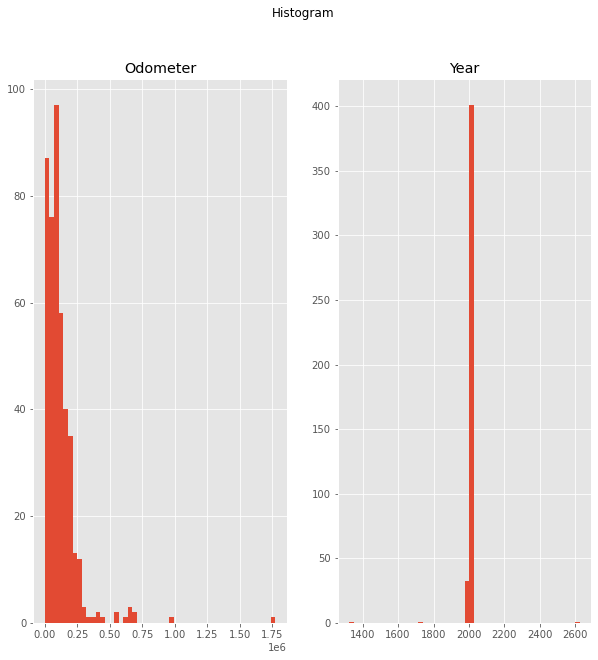

In [96]:
plt.figure(figsize=(10,10))
plt.suptitle("Histogram")

plt.subplot(1,2,1)
plt.hist(test.odometer, bins=50)
plt.title('Odometer')

plt.subplot(1,2,2)
plt.hist(test.year, bins=50)
plt.title('Year')

plt.show()


In [100]:
test.year.unique()

array([2017, 2013, 2012, 2001, 2000, 2003, 2006, 2020, 2016, 2011, 2010,
       2008, 2007, 1997, 2009, 2004, 2014, 2002, 1998, 2018, 2019, 2015,
       1993, 2005, 1996, 1994, 1999, 1987, 1324, 2626, 1726])

In [104]:
test[(test.year < 1400) | (test.year > 2022)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
304,304,Mercedes-Benz CABIN PLUS CHASSIS ONLY,650923,Lagos,Locally used,6-cylinder(V6),manual,diesel,blue,1324
406,406,Mercedes-Benz DUMP TRUCK,0,Lagos,Locally used,8-cylinder(V8),manual,diesel,white,2626


In [136]:
# 평균값으로 대체
test.year[(test.year < 1400) | (test.year > 2022)] = int(np.mean(test.year))

<ipython-input-136-9e2a7ba34111>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.year[(test.year < 1400) | (test.year > 2022)] = int(np.mean(test.year))


In [142]:
test.describe(include='object')

,title,location,isimported,engine,transmission,fuel,paint
count,436,436,436,436,436,436,436
unique,124,11,3,8,2,2,46
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,52,338,321,278,414,416,118


In [146]:
test['brand'] = test.title.apply(lambda x:x.split()[0])

In [147]:
test.brand.unique()

array(['Mercedes-Benz', 'Honda', 'Toyota', 'Iveco', 'Lexus', 'Nissan',
       'Volkswagen', 'Jeep', 'Ford', 'BMW', 'Mack', 'Land', 'Hyundai',
       'Peugeot', 'Volvo', 'Infiniti', 'Acura', 'Man', 'Fiat', 'MINI',
       'DAF', 'Mazda', 'Porsche', 'Mitsubishi', 'Chevrolet', 'Kia',
       'Pontiac', 'Rolls-Royce'], dtype=object)

In [148]:
test.paint.unique()

array(['White', 'Black', 'Dark Grey', 'Red', 'Silver', 'white', 'Blue',
       'Gray', 'Grey', 'Gold', 'Green', 'Silver ', 'Sliver ', 'Gold ',
       'Black ', 'Cream', 'Brown', 'black', 'Yellow', 'Cream ',
       'Dark Green', 'White and green', 'Grey ', 'Light Grey', 'Maroon',
       'Wine', 'Ash', 'GOLD', 'Blac', 'Dark Blue', 'Dark Ash', 'green',
       'Sliver', 'Golf', 'BLACK', 'Dark blue ', 'Blue ', 'blue',
       'Navy blue', 'Indigo ink pearl', '  Brown', 'Grey and black',
       'Green ', 'Classic Silver Met(1F7)', 'Beige', 'Mint green'],
      dtype=object)

In [149]:
test['paint'] = clean_text(test.paint)
test.paint.unique()

array(['white', 'black', 'dark grey', 'red', 'silver', 'blue', 'gray',
       'grey', 'gold', 'green', 'sliver', 'cream', 'brown', 'yellow',
       'dark green', 'white and green', 'light grey', 'maroon', 'wine',
       'ash', 'blac', 'dark blue', 'dark ash', 'golf', 'navy blue',
       'indigo ink pearl', 'grey and black', 'classic silver metf',
       'beige', 'mint green'], dtype=object)

In [152]:
# 오타교정
test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'pearl' if x.find('pearl') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('blac') >= 0 else x)

In [156]:
# top 10
test_title10 = test[test['title'].apply(lambda x : x in test['title'].value_counts()[:10].keys())]
test_brand10 = test[test['brand'].apply(lambda x : x in test['brand'].value_counts()[:10].keys())]

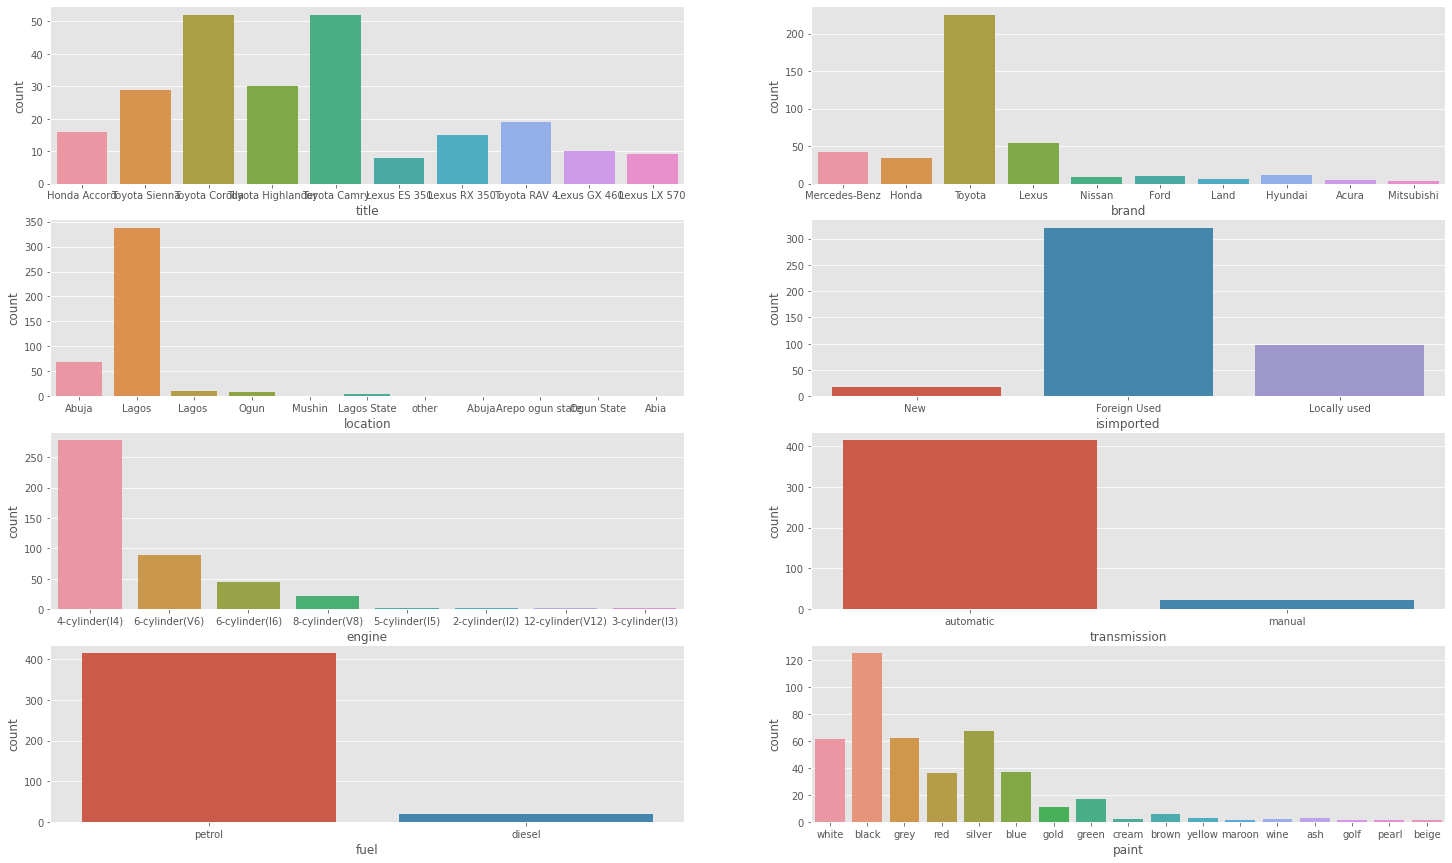

In [157]:
plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.countplot(data=test_title10, x='title')
plt.subplot(4,2,2)
sns.countplot(data=test_brand10, x='brand')
count = 3

for i in test.describe(include="object").columns.drop(['title'])[:-1]:
    plt.subplot(4,2,count)
    sns.countplot(data=test, x=i)
    count += 1

In [158]:
test_label_maps = LabelEncoding(test)
test = label_encoder(test, test_label_maps)
test.head()

{'title': {'unknown': 0, 'Mercedes-Benz C 300': 1, 'Honda Accord': 2, 'Mercedes-Benz S 550': 3, 'Toyota Sienna': 4, 'Toyota Hiace': 5, 'Toyota Corolla': 6, 'Iveco EUROCARGO 120e18': 7, 'Mercedes-Benz GLE 350': 8, 'Toyota Highlander': 9, 'Toyota Hilux': 10, 'Toyota Camry': 11, 'Mercedes-Benz C 180': 12, 'Lexus ES 350': 13, 'Honda Fit': 14, 'Toyota Matrix': 15, 'Toyota Venza': 16, 'Lexus IS 250': 17, 'Nissan Primera': 18, 'Volkswagen Sharan': 19, 'Jeep Wrangler': 20, 'Volkswagen Golf': 21, 'Mercedes-Benz 814': 22, 'Nissan Sentra': 23, 'Volkswagen Passat': 24, 'Mercedes-Benz GLK 350': 25, 'Lexus RX 350': 26, 'Ford Mondeo': 27, 'BMW X3': 28, 'Mack CXN613 CAB BEHIND ENGINE': 29, 'Toyota RAV 4': 30, 'Land Rover Discovery': 31, 'Toyota Avalon': 32, 'Lexus GX 460': 33, 'Hyundai Santa Fe': 34, 'Peugeot 206': 35, 'Volvo FL7': 36, 'Mercedes-Benz C 320': 37, 'Hyundai Sonata': 38, 'Infiniti FX': 39, 'Honda Civic': 40, 'Mercedes-Benz CLS 500': 41, 'Mercedes-Benz GLK 300': 42, 'Acura RDX': 43, 'Merce

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,1,1234,1,1,1,1,1,1,2017,1
1,1,2,29938,1,2,1,1,1,1,2013,2
2,2,3,87501,2,2,1,1,1,2,2012,1
3,3,4,180894,2,3,2,1,1,3,2001,3
4,4,5,104814,2,2,1,1,1,1,2000,3


# predict

In [178]:
# models
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor

submission = pd.read_csv("data/sample_submission.csv")
models = []

models.append(GradientBoostingRegressor(learning_rate=1e-2,criterion='mae'))
models.append(RandomForestRegressor())
models.append(ExtraTreesRegressor())

for i, model in enumerate(models):
    model.fit(train_X, train_y)
    y_hat = model.predict(test)

    submission['target'] = y_hat

    submission.to_csv(f"data/submission_{i}.csv", index=False)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


In [180]:
test.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,1,1234,1,1,1,1,1,1,2017,1
1,2,29938,1,2,1,1,1,1,2013,2
2,3,87501,2,2,1,1,1,2,2012,1
3,4,180894,2,3,2,1,1,3,2001,3
4,5,104814,2,2,1,1,1,1,2000,3


In [181]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,1,18277,1,1,1,1,1,1,2016,13665000,1
1,1,2,10,2,2,1,1,1,2,2019,33015000,1
2,2,3,83091,2,1,2,1,1,1,2012,9915000,2
3,3,4,91524,2,1,1,1,1,3,2007,3815000,3
4,4,5,94177,2,1,2,1,1,1,2010,7385000,1


In [ ]:
# 모델성능향상

train = train.drop('id', axis=1)

In [1]:
# divide the data (train : train, validation)

from sklearn.model_selection import train_test_split

data = train.copy() #필요없는 id열 삭제
train_data, val_data = train_test_split(data, test_size=0.25) #25프로로 설정
train_data.reset_index(inplace=True) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val_data.reset_index(inplace=True)


# Split tarin_data : target

train_data_x = train_data.drop(['target', 'index'], axis=1)
train_data_y = train_data.target

val_data_x = val_data.drop(['target', 'index'], axis=1)
val_data_y = val_data.target

# total data
train_X = train.drop('target', axis=1)
train_y = train.target

NameError: name 'train' is not defined

In [ ]:
# 현재 모델 성능지표 (mae)
models = {}

models['GBM'] = GradientBoostingRegressor(learning_rate=0.05, criterion='mae', n_estimators = 200)
models['RandomForest'] = RandomForestRegressor(n_estimators=100)
models['ExtraTrees'] = ExtraTreesRegressor(n_estimators=100)

for k, model in models.items():
    
    model.fit(train_data_x, train_data_y)
    y_hat = model.predict(val_data_x)

    print(f"{k}`s MAE : {nmae(val_data_y, y_hat)}")

RandomForest`s MAE : 0.4043584896864535
ExtraTrees`s MAE : 0.36982119151896614


In [224]:
# 추가적인 파생변수 및 정규화적용
## title, brand 다중공선성 ( title drop )

drop_title_train = train.drop('title', axis=1)

140512181805552
140512178686512


In [227]:
from sklearn.model_selection import train_test_split

non_title_train, non_title_test = train_test_split(drop_title_train, test_size=0.25)

non_title_train.reset_index(inplace=True)
non_title_test.reset_index(inplace=True)

print(len(non_title_train))
print(len(non_title_test))

759
254


In [228]:
non_title_train_x = non_title_train.drop('target', axis=1)
non_title_train_y = non_title_train.target

non_title_test_x = non_title_test.drop('target', axis=1)
non_title_test_y = non_title_test.target

In [231]:
# 현재 모델 성능지표 (mae)
models = {}

models['GBM'] = GradientBoostingRegressor(learning_rate=0.05, criterion='mae', n_estimators = 200)
models['RandomForest'] = RandomForestRegressor(n_estimators=100)
models['ExtraTrees'] = ExtraTreesRegressor(n_estimators=100)

for k, model in models.items():
    
    model.fit(non_title_train_x, non_title_train_y)
    y_hat = model.predict(non_title_test_x)

    print(f"{k}'s MAE : {nmae(non_title_test_y, y_hat)}")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


GBM's MAE : 0.4468632652630403
RandomForest's MAE : 0.4112359528273549
ExtraTrees's MAE : 0.40812750085182015


In [237]:
label_maps['brand']

{'unknown': 0,
 'Toyota': 1,
 'Land': 2,
 'Lexus': 3,
 'Pontiac': 4,
 'Ford': 5,
 'Honda': 6,
 'Volvo': 7,
 'BMW': 8,
 'Infiniti': 9,
 'Mercedes-Benz': 10,
 'Hyundai': 11,
 'Jaguar': 12,
 'Mitsubishi': 13,
 'Nissan': 14,
 'Mack': 15,
 'Chevrolet': 16,
 'Mazda': 17,
 'Lincoln': 18,
 'Kia': 19,
 'Volkswagen': 20,
 'Acura': 21,
 'DAF': 22,
 'Man': 23,
 'Isuzu': 24,
 'IVM': 25,
 'Porsche': 26,
 'MINI': 27,
 'Dodge': 28,
 'GMC': 29,
 'Iveco': 30,
 'Scania': 31,
 'GAC': 32,
 'IVECO': 33,
 'Peugeot': 34,
 'Rolls-Royce': 35,
 'MAN-VOLKSWAGEN': 36,
 'Jeep': 37,
 'ALPINA': 38,
 'Bentley': 39,
 'JMC': 40,
 'Audi': 41}

In [238]:
train.brand.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41])

In [239]:
my_set={ 'Toyota': 1,
 'Land': 2,
 'Lexus': 3,
 'Pontiac': 4,
 'Ford': 5,
 'Honda': 6,
 'Volvo': 7,
 'BMW': 8,
 'Infiniti': 9,
 'Mercedes-Benz': 10,
 'Hyundai': 11,
 'Jaguar': 12,
 'Mitsubishi': 13,
 'Nissan': 14,
 'Mack': 15,
 'Chevrolet': 16,
 'Mazda': 17,
 'Lincoln': 18,
 'Kia': 19,
 'Volkswagen': 20,
 'Acura': 21,
 'DAF': 22,
 'Man': 23,
 'Isuzu': 24,
 'IVM': 25,
 'Porsche': 26,
 'MINI': 27,
 'Dodge': 28,
 'GMC': 29,
 'Iveco': 30,
 'Scania': 31,
 'GAC': 32,
 'IVECO': 33,
 'Peugeot': 34,
 'Rolls-Royce': 35,
 'MAN-VOLKSWAGEN': 36,
 'Jeep': 37,
 'ALPINA': 38,
 'Bentley': 39,
 'JMC': 40,
 'Audi': 41}

In [254]:
your_set = {'Toyota', 'Land', 'Lexus', 'Pontiac', 'Ford',  'Honda', 'Volvo', 'BMW' ,'Infiniti',
 'Mercedes-Benz', 'Hyundai' ,'Jaguar', 'Mitsubishi', 'Nissan' ,'Chevrolet',
 'Mazda' ,'Lincoln', 'Kia' ,'Acura', 'DAF', 'Man', 'Isuzu', 'IVM', 'Porsche',
 'MINI', 'GMC', 'Iveco' ,'Scania' ,'Volkswagen', 'GAC' ,'IVECO', 'Mack', 'Peugeot',
 'Rolls-Royce', 'MAN-VOLKSWAGEN', 'Jeep' ,'ALPINA' ,'Bentley', 'JMC'}

In [256]:
set(my_set.keys())-your_set

{'Audi', 'Dodge'}

In [ ]:
import 